In [28]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_pickle('final_df.pkl')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 12 columns):
recency               64000 non-null int64
history               64000 non-null float64
used_discount         64000 non-null int64
used_bogo             64000 non-null int64
is_referral           64000 non-null int64
conversion            64000 non-null int64
zip_code_Surburban    64000 non-null uint8
zip_code_Urban        64000 non-null uint8
channel_Phone         64000 non-null uint8
channel_Web           64000 non-null uint8
offer_Discount        64000 non-null uint8
offer_No Offer        64000 non-null uint8
dtypes: float64(1), int64(5), uint8(6)
memory usage: 3.3 MB


In [4]:
df.columns

Index(['recency', 'history', 'used_discount', 'used_bogo', 'is_referral',
       'conversion', 'zip_code_Surburban', 'zip_code_Urban', 'channel_Phone',
       'channel_Web', 'offer_Discount', 'offer_No Offer'],
      dtype='object')

In [5]:
df.head()

,recency,history,used_discount,used_bogo,is_referral,conversion,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web,offer_Discount,offer_No Offer
0,10,142.44,1,0,0,0,1,0,1,0,0,0
1,6,329.08,1,1,1,0,0,0,0,1,0,1
2,7,180.65,0,1,1,0,1,0,0,1,0,0
3,9,675.83,1,0,1,0,0,0,0,1,1,0
4,2,45.34,1,0,0,0,0,1,0,1,0,0


In [6]:
df.conversion.value_counts()

0    54606
1     9394
Name: conversion, dtype: int64

In [8]:
X = df.drop(['conversion'], axis=1)

In [10]:
y = df.conversion

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
rf = RandomForestClassifier(n_estimators=50, n_jobs=-1, class_weight=)

In [13]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [14]:
preds = rf.predict(X_test)

In [16]:
accuracy_score(y_test, preds)

0.80071022727272723

In [17]:
precision_score(y_test, preds)

0.18836565096952909

In [18]:
recall_score(y_test,preds)

0.11024643320363164

In [19]:
confusion_matrix(y_test,preds)

array([[16571,  1465],
       [ 2744,   340]])

In [20]:
rf.feature_importances_

array([ 0.13022284,  0.76851124,  0.0115828 ,  0.01068972,  0.0119281 ,
        0.01509377,  0.01467555,  0.00834116,  0.00936942,  0.0103477 ,
        0.0092377 ])

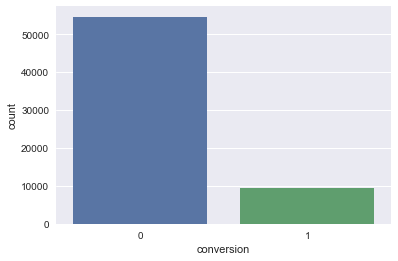

In [26]:
sns.countplot(df.conversion)

In [30]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer

random_state = 2018
np.random.seed(random_state)

cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = random_state)

rdf = RandomForestClassifier(random_state = random_state) 
scoring = {'Recall': make_scorer(recall_score),
           'f1_score': make_scorer(f1_score)
          }

params = {'max_depth': [6, 8, 10, 20], 
              'min_samples_split': [5, 10, 15],
              'min_samples_leaf' : [4, 8, 12],
              'n_estimators' : [300, 400, 500]
             }

grid_clf = GridSearchCV(estimator = rdf, param_grid = params, cv = cv, n_jobs=-1, verbose=4)
grid_clf.fit(X, y)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  5.4min


KeyboardInterrupt: 